In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Data Load
file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\seeds_dataset.txt'
df = pd.read_csv(file_path, sep = '\t')

#데이터 시각화
display(df)
print(df.columns)

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Index(['15.26', '14.84', '0.871', '5.763', '3.312', '2.221', '5.22', '1'], dtype='object')


In [2]:
df = df.rename(columns = {'15.26':'area', '14.84':'perimeter', '0.871':'compactness', '5.763':'kernel_length', '3.312':'kernel_width', 
'2.221':'asymmetry_coefficient', '5.22':'kernel_groove', '1':'result'})
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove,result
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
#특성과 타겟 분리 (특성 : X, 타겟 : y)
X = df.drop('result', axis = 1)
y = df['result']

#trained data와 test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(167, 7) (167,)
(42, 7) (42,)


In [4]:
y_train = y_train -1
print(np.unique(y_train)) # label의 re-mapping

[0 1 2]


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
class SeedsModel(tf.keras.Model):
    def __init__(self):
        super(SeedsModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(12, activation='relu')
        self.out = tf.keras.layers.Dense(3, activation='softmax')  # categorical

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)

In [7]:
model = SeedsModel()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
histroy = model.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2869 - loss: 1.0044 - val_accuracy: 0.3824 - val_loss: 0.9101
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3667 - loss: 0.9343 - val_accuracy: 0.4118 - val_loss: 0.8395
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5815 - loss: 0.8200 - val_accuracy: 0.5000 - val_loss: 0.7928
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6189 - loss: 0.8041 - val_accuracy: 0.6176 - val_loss: 0.7547
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7155 - loss: 0.7251 - val_accuracy: 0.7059 - val_loss: 0.7235
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7808 - loss: 0.7085 - val_accuracy: 0.7647 - val_loss: 0.7027
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9356 - loss: 0.6017 - val_accuracy: 0.7941 - val_loss: 0.6812
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9408 - loss: 0.5389 - val_accuracy: 0.8824 - val_loss

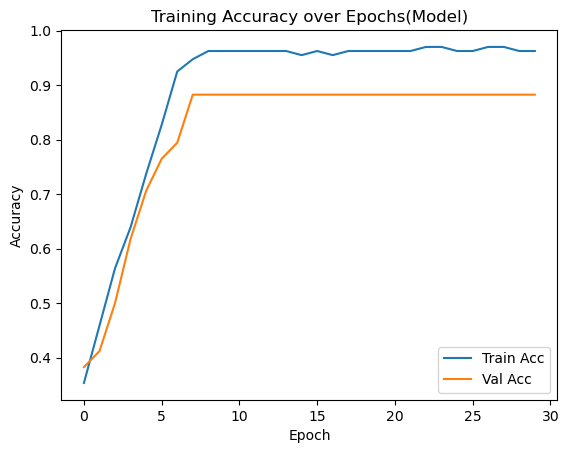

In [9]:
plt.plot(histroy.history['accuracy'], label='Train Acc')
plt.plot(histroy.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [11]:
input_layer = Input(shape=(7,))
x = Dense(16, activation='relu')(input_layer)
x = Dense(12, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)

In [12]:
model_2 = Model(inputs=input_layer, outputs=output_layer)

In [13]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history_2 = model_2.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4721 - loss: 1.1150 - val_accuracy: 0.5588 - val_loss: 0.9339
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5866 - loss: 0.9323 - val_accuracy: 0.7353 - val_loss: 0.8274
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 0.8984 - val_accuracy: 0.8235 - val_loss: 0.7213
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.7491 - val_accuracy: 0.8235 - val_loss: 0.6145
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8356 - loss: 0.6607 - val_accuracy: 0.9118 - val_loss: 0.5166
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.5495 - val_accuracy: 0.9412 - val_loss: 0.4427
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8962 - loss: 0.4721 - val_accuracy: 0.9118 - val_loss: 0.3844
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.4341 - val_accuracy: 0.8824 - val_loss

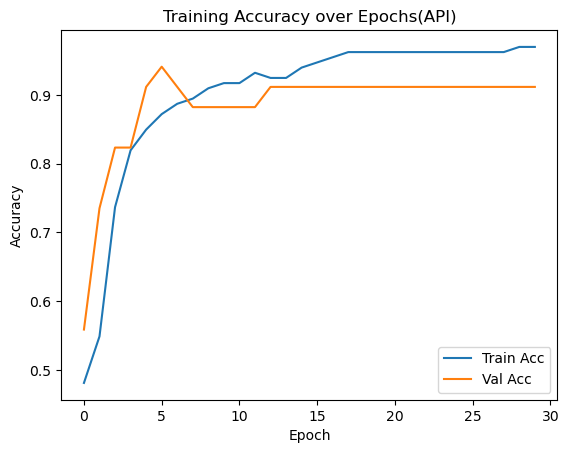

In [15]:
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(API)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model_3 = Sequential([
    Input(shape=(7,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

In [18]:
model_3.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history_3 = model_3.fit(X_train, y_train, epochs=30, batch_size=7, validation_split=0.2)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3059 - loss: 1.0428 - val_accuracy: 0.7647 - val_loss: 0.8081
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5543 - loss: 0.9274 - val_accuracy: 0.8529 - val_loss: 0.6565
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5735 - loss: 0.8400 - val_accuracy: 0.8529 - val_loss: 0.5541
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6745 - loss: 0.6359 - val_accuracy: 0.8529 - val_loss: 0.4917
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6430 - loss: 0.6684 - val_accuracy: 0.8529 - val_loss: 0.4530
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7011 - loss: 0.5853 - val_accuracy: 0.8529 - val_loss: 0.4268
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7168 - loss: 0.6006 - val_accuracy: 0.8824 - val_loss: 0.4037
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7578 - loss: 0.5654 - val_accuracy: 0.8824 - val_loss

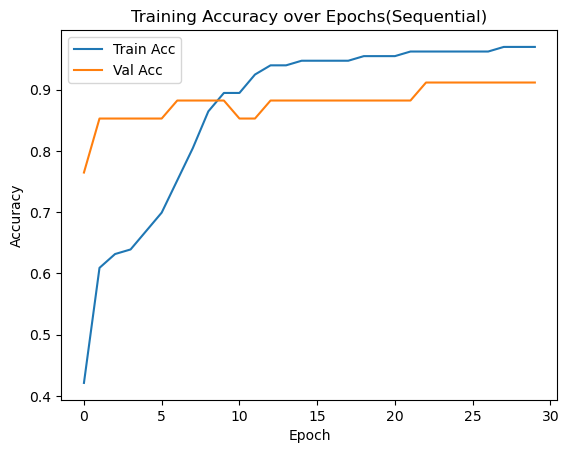

In [20]:
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Val Acc')
plt.title('Training Accuracy over Epochs(Sequential)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()